In [1]:
import pickle
from sklearn.manifold import TSNE
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


In [2]:
# dir = 'weibo'
# dir = 'citation'
valid = pickle.load(open("./valid_ana.pkl",'rb'))
test = pickle.load(open("./test_ana.pkl",'rb'))
valid.keys(),test.keys()

(dict_keys(['outputs_prediction', 'outputs_true', 'graph_hidden', 'rnn_hidden', 'graph_info', 'ptr', 'nodes_f', 'nodes_map']),
 dict_keys(['outputs_prediction', 'outputs_true', 'graph_hidden', 'rnn_hidden', 'graph_info', 'ptr', 'nodes_f', 'nodes_map']))

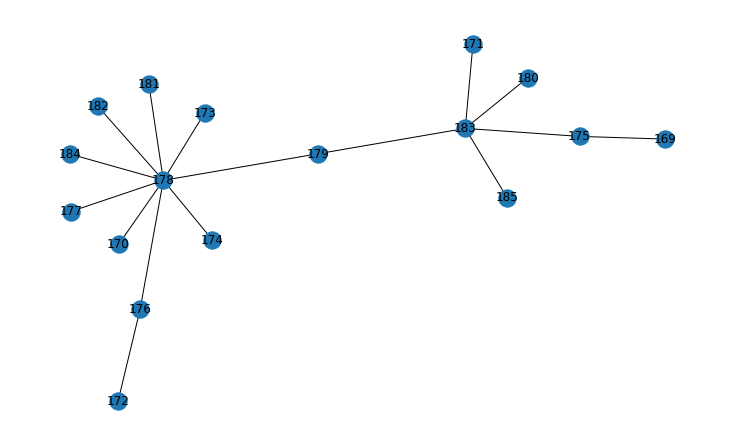

In [98]:
# print(valid['graph_info'][0][1])
idx = 80
split_at = valid['ptr'][idx]
example_graph = np.array(valid['graph_info'][idx][0])
# example_graph = example_graph[:,:100]
plt_num = 20
graph_nodes=[]
graph_whole=[]
GG = nx.Graph()
for at in range(len(split_at)-1):
    g = nx.Graph()
    nodes = range(split_at[at], split_at[at+1])
    for i in example_graph.T[:, :]:
        if i[0] in nodes or i[1] in nodes:
            if at in [11, 12, 13, ]:
                GG.add_nodes_from(i)
                GG.add_edge(i[0], i[1], weight=1)
            g.add_nodes_from(i)
            g.add_edge(i[0], i[1])
    plt.figure(figsize=(10, 6))
    nx.draw(g, with_labels=True)
    if at in [11,12,13,]:
        graph_nodes.append(list(g.nodes()))
        graph_whole.append(g)
        # plt.show()
    plt_num -= 1
    # print(plt_num)
    
    if plt_num == 0:
        break
    plt.close()


In [38]:
record_w = {}
idx = 80  # batch num # 15 is complicated

split_at = valid['ptr'][idx]
# if loc > split_at[-1]:
#     idx+=1
#     continue
example_graph = np.array(valid['graph_info'][idx][0])
atten_link = np.array((valid['graph_info'][idx][1][0]).tolist())
atten_w = np.array((valid['graph_info'][idx][1][1]).tolist())
atten_w = np.sum(atten_w, axis=1)
# atten_w = atten_w.T[0]
e_w = {}
local_e_w = {}
for i, e in enumerate(atten_link.T):
    e_w['{}'.format(e)] = atten_w[i]
# example_graph = example_graph[:,:100]


In [100]:
# print(graph_nodes[-3:])
graph_nodes
graph_whole
print(graph_nodes)
g=graph_whole[-1]
pos=nx.spring_layout(g)
# nx.draw(g,pos)

[[64, 67, 69, 60, 62, 65, 63, 61, 68, 66], [75, 78, 80, 70, 72, 76, 74, 71, 79, 77, 73], [87, 90, 93, 82, 84, 88, 86, 83, 91, 92, 89, 85, 81]]


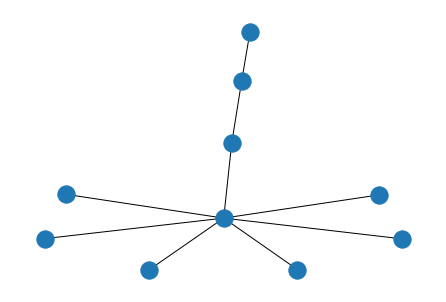

In [126]:
pos0=nx.spring_layout(graph_whole[0])
nx.draw(graph_whole[0], pos0)
# pos1=nx.spring_layout(graph_whole[1])
# pos2=nx.spring_layout(graph_whole[2])

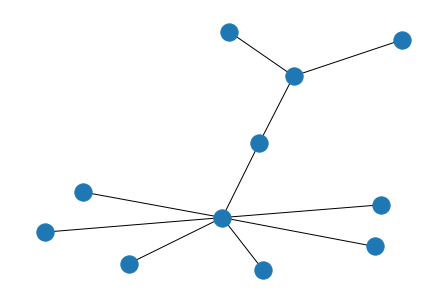

In [127]:
pos1 = nx.spring_layout(graph_whole[1])
nx.draw(graph_whole[1], pos1)


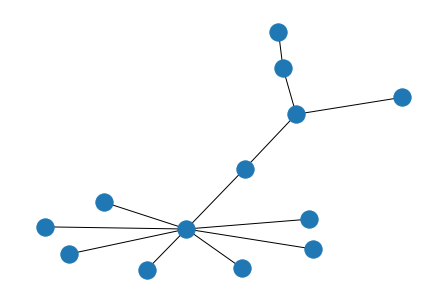

In [129]:
pos2 = nx.spring_layout(graph_whole[2])
nx.draw(graph_whole[2], pos2)


In [138]:
# pos0
# pos2
new_pos0={}
for i in pos0:
    new_pos0[i]=pos0[i]+np.array([-2,0])
new_pos2={}
for i in pos2:
    new_pos2[i] = pos2[i]+np.array([2, 0])


In [139]:
all_pos = {}
all_pos.update(new_pos0)
all_pos.update(pos1)
all_pos.update(new_pos2)


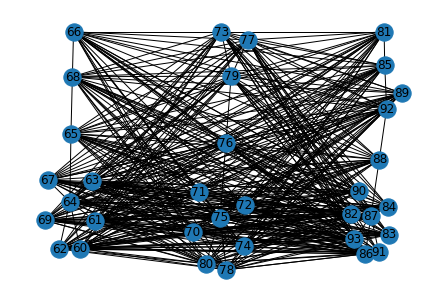

In [140]:
# plt.figure(figsize=(10, 6))
# nx.draw(GG, with_labels=True)
nodes_in_GG = list(GG.nodes())
for i in nodes_in_GG:
    for j in nodes_in_GG:
        e = [i, j]
        text = '[{} {}]'.format(i, j)
        # print(text)
        if text in e_w.keys():
            GG.add_edge(i, j, weight=e_w[text])
nx.draw(GG, all_pos, with_labels=True)


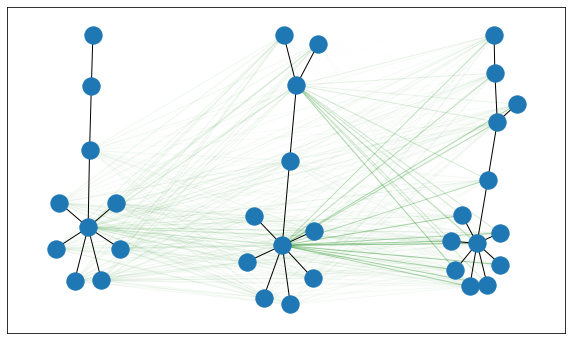

In [176]:
# GG_e = GG.edges()
# nx.draw_networkx_edges(GG, pos, edgelist=esmall,
#                        width=6, alpha=0.5, edge_color='b', style='dashed')
part_e_w={}
aphpa_value = []
plt.figure(figsize=(10, 6))
nx.draw_networkx_nodes(GG, all_pos)
E_in_GGe=[(u,v) for (u,v,d) in GG.edges(data=True) if d['weight'] ]
for e in E_in_GGe:
    key = "[{} {}]".format(e[0], e[1])
    if key in e_w:
        nx.draw_networkx_edges(GG, all_pos, edgelist=[e], alpha=e_w[key], edge_color='g')
        part_e_w[key] = e_w[key] if e_w[key] > 0.08 else 0.001
        aphpa_value.append(part_e_w[key])
    else:
        nx.draw_networkx_edges(GG, all_pos, edgelist=[e], alpha=1)

plt.show()  # display


In [174]:
max(aphpa_value),min(aphpa_value)

(0.40440443842089735, 0.001)

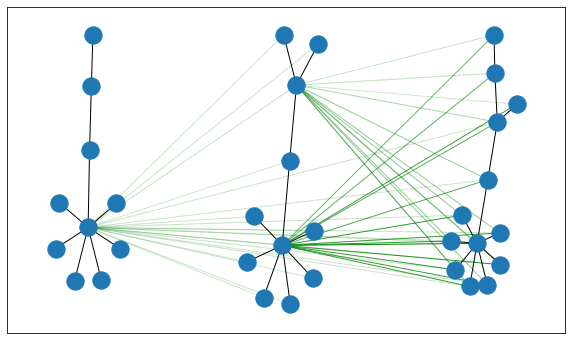

In [177]:
max(aphpa_value),min(aphpa_value)
for i in part_e_w:
    part_e_w[i]=(part_e_w[i]-min(aphpa_value))/(max(aphpa_value)-min(aphpa_value))
plt.figure(figsize=(10, 6))
nx.draw_networkx_nodes(GG, all_pos)
E_in_GGe = [(u, v) for (u, v, d) in GG.edges(data=True) if d['weight']]
for e in E_in_GGe:
    key = "[{} {}]".format(e[0], e[1])
    if key in part_e_w:
        nx.draw_networkx_edges(GG, all_pos, edgelist=[e], alpha=part_e_w[key], edge_color='g')
    else:
        nx.draw_networkx_edges(GG, all_pos, edgelist=[e], alpha=1)

plt.show()  # display
